In [1]:
import numpy as np
from rvm import RVMClassification
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_gaussian_quantiles

In [3]:
train_x = np.ndarray([])
train_y = np.ndarray([])

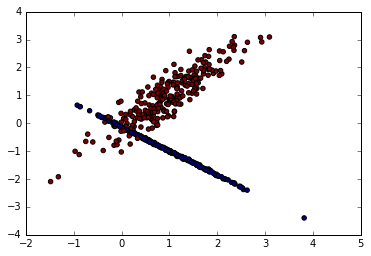

In [51]:
# np.random.seed(19)
X1, Y1 = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

#X1, Y1 = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2)
#plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)

In [52]:
train_x, test_x, train_y, test_y = train_test_split(X1, Y1, test_size=0.8)

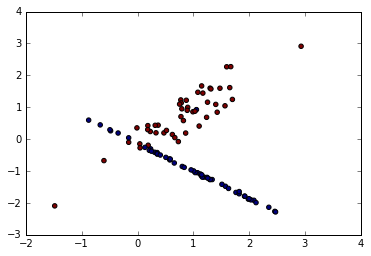

In [53]:
plt.scatter(train_x[:, 0], train_x[:, 1], marker='o', c=train_y)

In [54]:
train_x.shape

(100, 2)

In [61]:
cl = RVMClassification(kernel='rbf', gamma=2)
cl.fit(np.matrix(train_x), train_y)


FIRST LIKELIHOOD =  198.357416879

W_mp Evaluating
LIKELIHOOD 198.357416879
LIKELIHOOD 19.7359296019
-179.446565274

W_mp Evaluating
LIKELIHOOD 18.9108516057
LIKELIHOOD 17.1978143833
-2.19166838305

W_mp Evaluating
LIKELIHOOD 16.7191832226
LIKELIHOOD 15.8700509469
-1.09602071576

W_mp Evaluating
LIKELIHOOD 15.6231625069
LIKELIHOOD 15.1047929889
-0.634535538771

W_mp Evaluating
LIKELIHOOD 14.9886269681
LIKELIHOOD 14.6275473754
-0.434679246714

W_mp Evaluating
LIKELIHOOD 14.5539477214
LIKELIHOOD 14.3094755532
-0.301541666295

W_mp Evaluating
LIKELIHOOD 14.2524060551
LIKELIHOOD 14.0963259534
-0.195683852805

W_mp Evaluating
LIKELIHOOD 14.0567222023
LIKELIHOOD 13.9533377177
-0.124414958266

W_mp Evaluating
LIKELIHOOD 13.932307244
LIKELIHOOD 13.8570371091
-0.0807422098118

W_mp Evaluating
LIKELIHOOD 13.8515650342
LIKELIHOOD 13.7927256815
-0.0536779865118

W_mp Evaluating
LIKELIHOOD 13.7978870477
LIKELIHOOD 13.7506831902
-0.0361766053085

W_mp Evaluating
LIKELIHOOD 13.7617104424
LIKELIHOOD 1

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

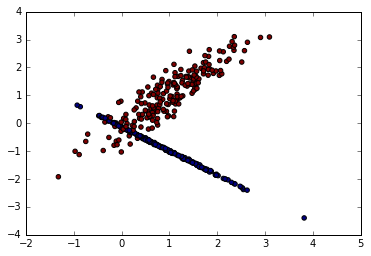

In [62]:
plt.scatter(test_x[:, 0], test_x[:, 1], marker='o', c=test_y)

0.88

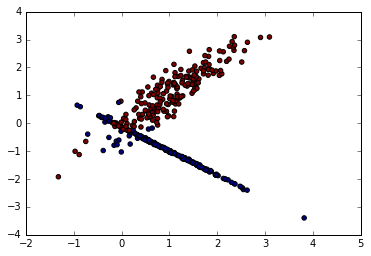

In [63]:
valid_pred = cl.predict(test_x)
plt.scatter(test_x[:, 0], test_x[:, 1], marker='o', c=valid_pred)

accuracy_score(test_y, valid_pred)

In [65]:
data = np.genfromtxt('banana_data.csv', delimiter=',')

In [66]:
data_y = data[:, 0]
data_x = data[:, [1, 2]]

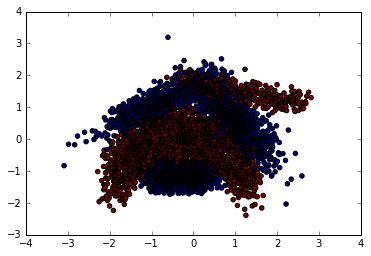

In [68]:
plt.scatter(data_x[:, 0], data_x[:, 1], marker='o', c=data_y)

In [87]:
iris_data = np.genfromtxt('data_sets/iris/iris.data.txt', delimiter=',', dtype=(float, float, float, float,'|S8'))

In [89]:
for i in range(len(iris_data)):
    if iris_data[i][-1] == b'Iris-set':
        iris_data[i][-1] = 0
    elif iris_data[i][-1] == b'Iris-ver':
        iris_data[i][-1] = 1
    else:
        iris_data[i][-1] = 2

In [129]:
data_x = []
data_y = []
for x in iris_data:
    data_x.append([x[i] for i in range(len(x) - 1)])
    data_y.append(int(x[-1]))

In [130]:
data_x = np.array(data_x)

In [133]:
data_x = np.array(data_x[:100])
data_y = np.array(data_y[:100])

In [150]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.9)

In [151]:
iris_cl = RVMClassification(kernel='rbf')
iris_cl.fit(train_x, train_y)

FIRST LIKELIHOOD =  6.27932613614

W_mp Evaluating
LIKELIHOOD 6.27932613614
LIKELIHOOD 3.57943472934
-3.19841495076

W_mp Evaluating
LIKELIHOOD 3.08091118538
LIKELIHOOD 2.91477465194
-0.451999338645

W_mp Evaluating
LIKELIHOOD 2.62891184673
LIKELIHOOD 2.541841773
-0.247811011145

W_mp Evaluating
LIKELIHOOD 2.38110083559
LIKELIHOOD 2.31942931279
-0.160536068165

W_mp Evaluating
LIKELIHOOD 2.22056476742
LIKELIHOOD 2.17406435992
-0.114267676655

W_mp Evaluating
LIKELIHOOD 2.10629709077
LIKELIHOOD 2.07309299557
-0.0822499311654

W_mp Evaluating
LIKELIHOOD 2.0240471596
LIKELIHOOD 2.00131334566
-0.0588051873096

W_mp Evaluating
LIKELIHOOD 1.96524197229
LIKELIHOOD 1.94924419577
-0.0429990345496

W_mp Evaluating
LIKELIHOOD 1.92224293774
LIKELIHOOD 1.90981829051
-0.0333953345107

W_mp Evaluating
LIKELIHOOD 1.88884760323
LIKELIHOOD 1.8780226574
-0.0283778141411

W_mp Evaluating
LIKELIHOOD 1.86046978909
LIKELIHOOD 1.85012363718
-0.0261997323322

W_mp Evaluating
LIKELIHOOD 1.83427005676
LIKELIHOOD

In [152]:
predict = iris_cl.predict(test_x)
accuracy_score(predict, test_y)

1.0

In [4]:
dt = tuple([int, '|S1'] + [float for i in range(30)])

In [5]:
cancer_data = np.genfromtxt('data_sets/breast-cancer-data/wdbc.csv', delimiter=',', dtype=dt)

In [6]:
for i in range(len(cancer_data)):
    if cancer_data[i][1] == b'M':
        cancer_data[i][1] = 0
    elif cancer_data[i][1] == b'B':
        cancer_data[i][1] = 1

In [7]:
cancer_data

array([ (842302, b'0', 17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189),
       (842517, b'0', 20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902),
       (84300903, b'0', 19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, 0.1974, 0.1279, 0.2069, 0.05999, 0.7456, 0.7869, 4.585, 94.03, 0.00615, 0.04006, 0.03832, 0.02058, 0.0225, 0.004571, 23.57, 25.53, 152.5, 1709.0, 0.1444, 0.4245, 0.4504, 0.243, 0.3613, 0.08758),
       (84348301, b'0', 11.42, 20.38, 77.58, 386.1, 0.1425, 0.2839, 0.2414, 0.1052, 0.2597, 0.09744, 0.4956, 1.156, 3.445, 27.23, 0.00911, 0.07458, 0.05661, 0.01867, 0.05963, 0.009208, 14.91, 26.5, 98.87, 567

In [8]:
c_data_x = []
c_data_y = []
for x in cancer_data:
    c_data_x.append([x[i] for i in range(2, len(x))])
    c_data_y.append(int(x[1]))
c_data_x = np.array(c_data_x)
c_data_y = np.array(c_data_y)

In [9]:
train_x, test_x, train_y, test_y = train_test_split(c_data_x, c_data_y, test_size=0.7)

In [12]:
cancer_cl = RVMClassification(kernel='rbf', learning_rate=0.2)
cancer_cl.fit(train_x, train_y)

FIRST LIKELIHOOD =  130.807387423

W_mp Evaluating
LIKELIHOOD 130.807387423
LIKELIHOOD 100.812476125
-27.2070616251

W_mp Evaluating
LIKELIHOOD 103.600325798
LIKELIHOOD 103.20643964
1.71683091641

W_mp Evaluating
LIKELIHOOD 105.317156714
LIKELIHOOD 105.049499398
1.37797357251

W_mp Evaluating
LIKELIHOOD 106.695130287
LIKELIHOOD 106.506332947
1.12379161236

W_mp Evaluating
LIKELIHOOD 107.818921899
LIKELIHOOD 107.681684825
0.931773701461

W_mp Evaluating
LIKELIHOOD 108.750695601
LIKELIHOOD 108.648181896
0.78136053973

W_mp Evaluating
LIKELIHOOD 109.532056141
LIKELIHOOD 109.453855571
0.663083520418

W_mp Evaluating
LIKELIHOOD 110.195139661
LIKELIHOOD 110.134308949
0.570034928503

W_mp Evaluating
LIKELIHOOD 110.765174589
LIKELIHOOD 110.71693899
0.49323118928

W_mp Evaluating
LIKELIHOOD 111.258405779
LIKELIHOOD 111.219664604
0.431743764802

W_mp Evaluating
LIKELIHOOD 111.690149544
LIKELIHOOD 111.658534172
0.379436107428

W_mp Evaluating
LIKELIHOOD 112.069585651
LIKELIHOOD 112.043550927
0.33

In [14]:
cancer_predict = cancer_cl.predict(test_x)
accuracy_score(cancer_predict, test_y)

0.8721804511278195